K-Means and Hierarchical Clustering on Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Load Dataset
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
print('Dataset Loaded Successfully')
print(df.head())

Dataset Loaded Successfully
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 r

In [3]:
# Data Info
print('Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-nu

In [4]:
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
print('Numeric Columns Used for Clustering:', df_numeric.columns.tolist())
df_numeric = df_numeric.dropna()

Numeric Columns Used for Clustering: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']


In [5]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
print('Data Standardized')

Data Standardized


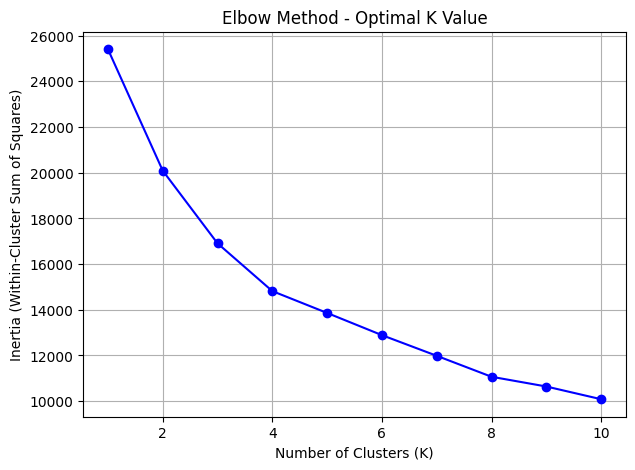

In [6]:
# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method - Optimal K Value')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

In [7]:
# Apply K-Means Clustering
optimal_k = 4  # Adjust based on Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
print('K-Means Clustering Applied')

K-Means Clustering Applied


In [8]:
# Cluster Summary
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print('Cluster Summary:', cluster_summary)

Cluster Summary:           ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
Cluster                                                              
0        10392.297071        36.884937  83.445251         5.972803   
1        10251.917722        35.882911  98.114736         6.526371   
2        10181.122172        34.880845  85.962443         6.419306   
3        10250.628065        33.096730  63.045463         6.752044   

               SALES    QTR_ID  MONTH_ID      YEAR_ID        MSRP  
Cluster                                                            
0        3747.880146  1.368201  3.002092  2005.000000  100.167364  
1        4667.745464  3.630802  9.835443  2003.566456  127.525316  
2        3468.713846  1.485671  3.368024  2003.565611  100.726998  
3        2065.888501  3.529973  9.577657  2003.589918   66.435967  


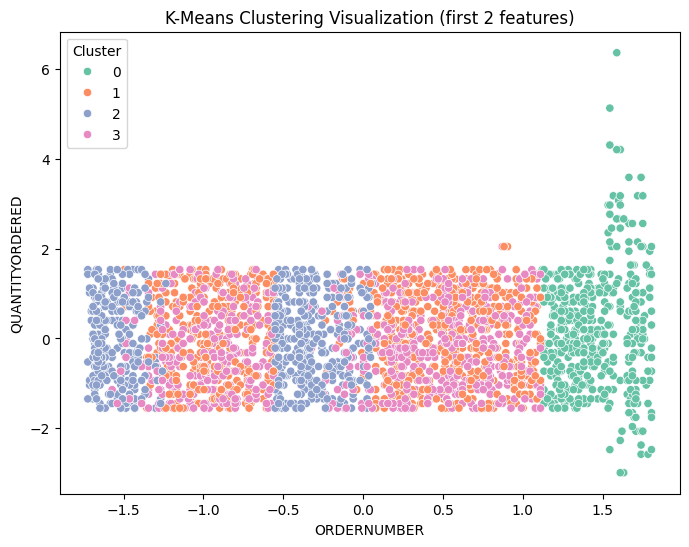

In [9]:
# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=df['Cluster'], palette='Set2')
plt.title('K-Means Clustering Visualization (first 2 features)')
plt.xlabel(df_numeric.columns[0])
plt.ylabel(df_numeric.columns[1])
plt.legend(title='Cluster')
plt.show()

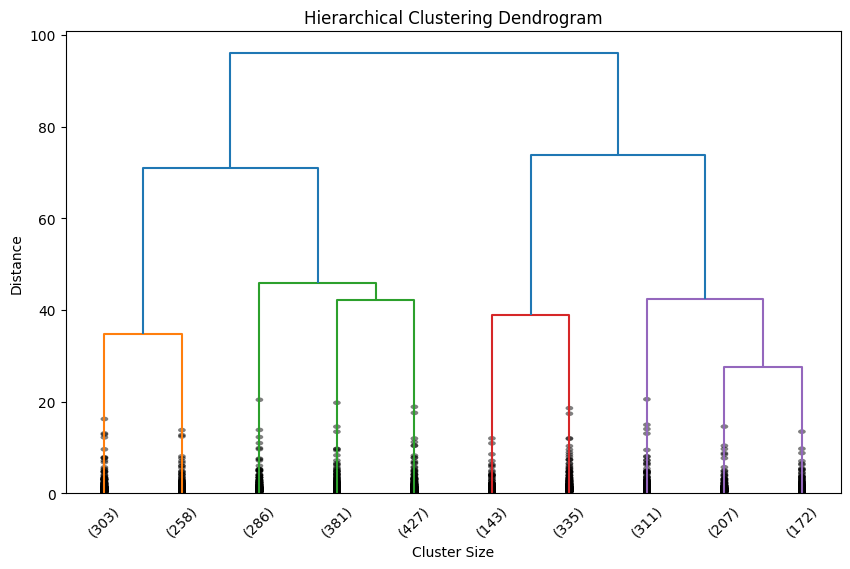

Hierarchical Clustering Labels Added:
   Cluster  Hier_Cluster
0        2             4
1        2             4
2        2             2
3        1             1
4        1             1


In [10]:
# Hierarchical Clustering (Optional)
plt.figure(figsize=(10,6))
Z = linkage(scaled_data, method='ward')
dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

hier_labels = fcluster(Z, t=4, criterion='maxclust')
df['Hier_Cluster'] = hier_labels
print('Hierarchical Clustering Labels Added:')
print(df[['Cluster','Hier_Cluster']].head())